In [2]:
!ls

 app.py		     ml_data.csv	       'smuzammil proj.md'
 best_model.h5	    'ML Model.ipynb'	       'smuzammil proj.pdf'
 data_pipeline2.py   MLModels		        tech_calc.py
 data_pipeline.py    Project-Plan.xlsx	        technical_data.db
 dp.py		     receive_data_vectorbt.py   use_endpoints.ipynb
 EndPoint.txt	     requests
 gat.py		     send_data_questdb.py


In [1]:
import requests
import pandas as pd
import yfinance as yf
import numpy as np

def fetch_tickers():
    try:
        print("getting tickers...")
        api_key = "jWGIkWgNiFf7mJynZvy5wHNrsd3w0qZw" # jWGIkWgNiFf7mJynZvy5wHNrsd3w0qZw
        base_url = f"https://financialmodelingprep.com/api/v3/available-traded/list"
        params = {'apikey': api_key}
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        data = response.json()
        df = pd.json_normalize(data)
        return df
    except RequestException as e:
        print(f"Error fetching data for {symbol}: {str(e)}")
        return []
        
# print(fetch_tickers().head())

# 2. Use yfinance to collect all historical data prices for past 30 years

# Download historical price data using Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    print(f"Fetching {symbol} Stock Data...")
    data = yf.download(symbol, start=start_date, end=end_date)
    # data['Symbol'] = symbol
    return data

/home/tim/anaconda3/envs/tf10/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
from datetime import date

dat = date.today()
str(dat)

'2024-02-15'

In [4]:
start_date = "2021-08-30" # 1994-01-01 # 2020
end_date = str(dat) # "2024-01-01"

df = fetch_historical_data("AMZN", start_date, end_date)
df.to_csv("ml_data.csv")

Fetching AMZN Stock Data...


[*********************100%%**********************]  1 of 1 completed


In [5]:
df.shape

(619, 6)

# CNN

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("ml_data.csv")

# Prepare the features and target
X = df.drop(['Date', 'Close'], axis=1).values
y = df['Close'].values

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape the data for CNN input
num_features = X_scaled.shape[1]
num_samples = X_scaled.shape[0]
X_reshaped = X_scaled.reshape((num_samples, num_features, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, shuffle=False)

# Define the CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(num_features, 1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile and train the CNN model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Train R-squared:', r2_train)
print('Test R-squared:', r2_test)


2024-02-13 18:36:32.221049: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 18:36:38.644416: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
189/189 [==============================] - 4s 17ms/step - loss: 152.5655 - val_loss: 9967.8877
Epoch 2/20
189/189 [==============================] - 2s 12ms/step - loss: 58.6190 - val_loss: 3251.4246
Epoch 3/20
189/189 [==============================] - 3s 13ms/step - loss: 4.0524 - val_loss: 636.7787
Epoch 4/20
189/189 [==============================] - 2s 11ms/step - loss: 0.0463 - val_loss: 535.8570
Epoch 5/20
189/189 [==============================] - 2s 12ms/step - loss: 0.0209 - val_loss: 500.1433
Epoch 6/20
189/189 [==============================] - 2s 9ms/step - loss: 0.0150 - val_loss: 476.2874
Epoch 7/20
189/189 [==============================] - 2s 12ms/step - loss: 0.0129 - val_loss: 460.7415
Epoch 8/20
189/189 [==============================] - 3s 13ms/step - loss: 0.0122 - val_loss: 453.0693
Epoch 9/20
189/189 [==============================] - 2s 10ms/step - loss: 0.0119 - val_loss: 444.5140
Epoch 10/20
189/189 [==============================] - 3s 14ms/step -

In [2]:
y_pred_test

array([[ 42.784904],
       [ 42.52003 ],
       [ 42.68371 ],
       ...,
       [156.17038 ],
       [157.26299 ],
       [156.7757  ]], dtype=float32)

In [3]:
y_test

array([ 42.77000046,  42.30749893,  43.06499863, ..., 193.1499939 ,
       193.58000183, 192.52999878])

In [6]:
X_train[-sequence_length:].shape

(3, 5, 1)

In [9]:
X_test.shape

(1511, 5, 1)

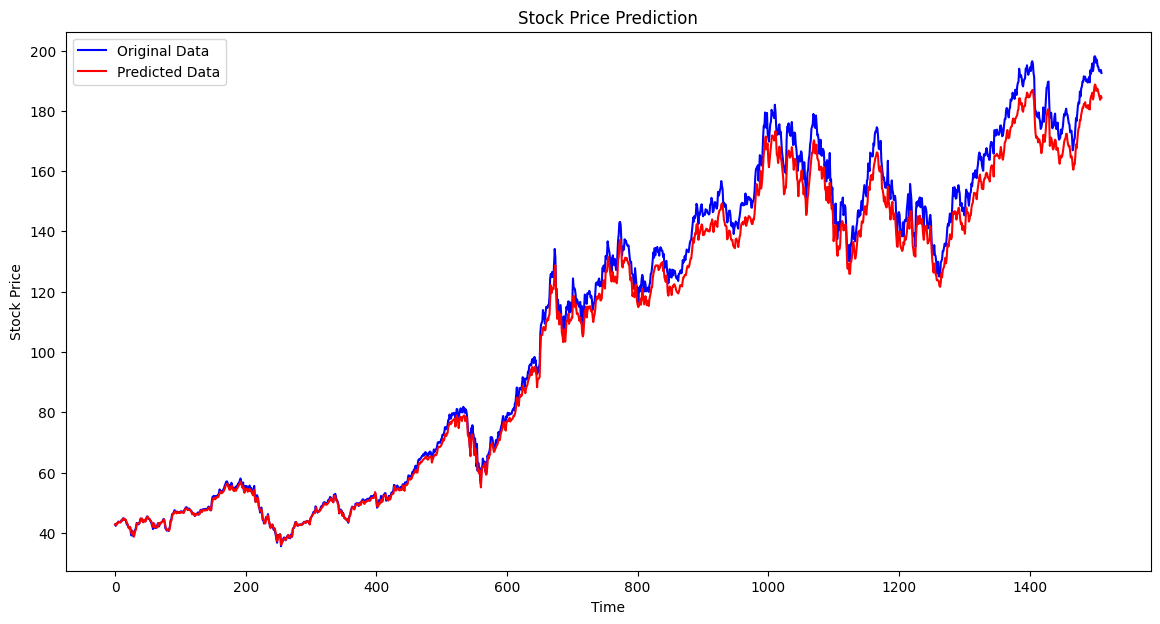

In [24]:
import matplotlib.pyplot as plt

# Inverse transform the original test data
# original_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the original test data and the predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Original Data', color='blue')
plt.plot(y_pred_test, label='Predicted Data', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# LSTM

In [109]:
import pandas as pd
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load the stock price data
df = pd.read_csv("ml_data.csv")
dataset = df['Close'].values.reshape(-1, 1)
sequence_length = 10
batch_size=32
epochs=100
learning_rate=0.01
patience=10

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for the LSTM model
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    # print(np.array(X).shape, np.array(y).shape)
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
# print(X_train.shape, X_test.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=30, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(units=25))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

# Make predictions
last_sequence = train_data[-sequence_length:]
# print((last_sequence.shape))
last_sequence = last_sequence.reshape(1, sequence_length, 1)

predicted_values = []
for _ in tqdm(range(len(test_data)), desc="Making Predictions"):
    predicted_value = model.predict(last_sequence, verbose=0)[0]
    predicted_values.append(predicted_value)
    last_sequence = np.append(last_sequence[:, 1:, :], [[predicted_value]], axis=1)

predicted_values = np.array(predicted_values).reshape(-1, 1)
predicted_values = scaler.inverse_transform(predicted_values)

# Train Loss: 1.9943654478993267e-05
# Test Loss: 0.0010028074029833078


Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 0.0285
Epoch 1: val_loss improved from inf to 0.00839, saving model to best_model.h5
32/32 [==============================] - 9s 84ms/step - loss: 0.0285 - val_loss: 0.0084
Epoch 2/100
31/32 [============================>.] - ETA: 0s - loss: 0.0066
Epoch 2: val_loss improved from 0.00839 to 0.00234, saving model to best_model.h5
32/32 [==============================] - 2s 61ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 0.0051
Epoch 3: val_loss did not improve from 0.00234
32/32 [==============================] - 2s 49ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 4/100
31/32 [============================>.] - ETA: 0s - loss: 0.0049
Epoch 4: val_loss improved from 0.00234 to 0.00151, saving model to best_model.h5
32/32 [==============================] - 2s 57ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 5/100
31/32 [============================>.] - ET

Making Predictions: 100%|█████████████████████| 252/252 [00:15<00:00, 15.88it/s]


In [110]:
# # Plot actual vs. predicted stock prices
# plt.figure(figsize=(14, 7))
# plt.plot(df.index[train_size + sequence_length:], df['Close'][train_size + sequence_length:], label='Actual')
# plt.plot(df.index[train_size + sequence_length:], predicted_values, label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.title('Actual vs. Predicted Stock Prices')
# plt.legend()
# plt.show()

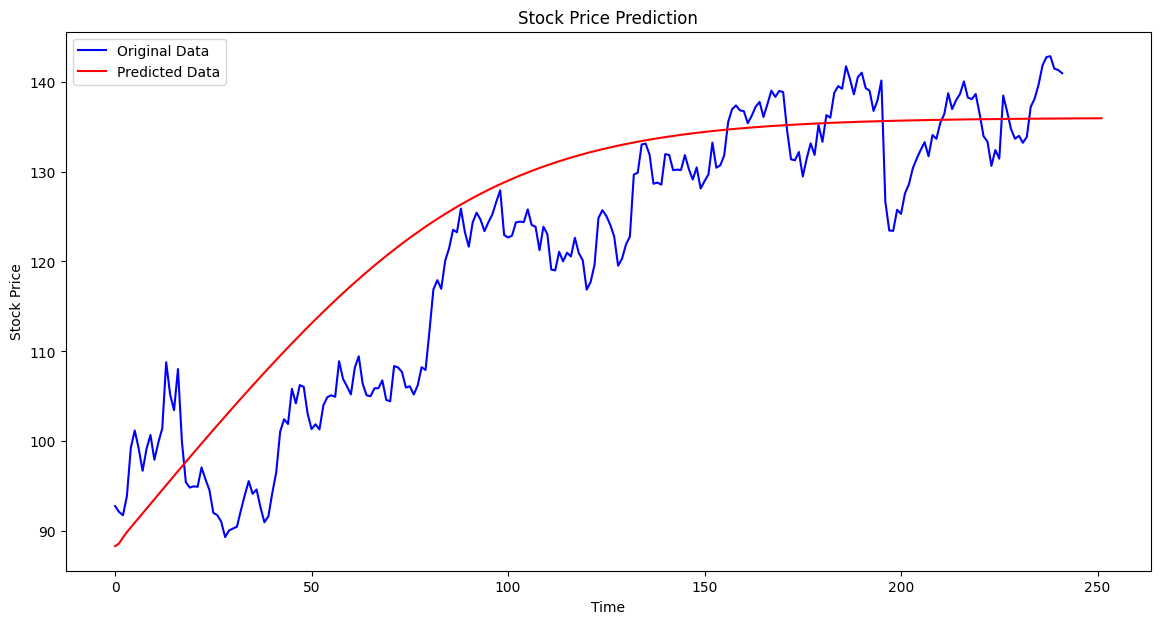

In [111]:
import matplotlib.pyplot as plt

# Inverse transform the original test data
original_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the original test data and the predicted values
plt.figure(figsize=(14, 7))
plt.plot(original_values, label='Original Data', color='blue')
plt.plot(predicted_values, label='Predicted Data', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [112]:
preds = predicted_values[-(len(predicted_values) - len(original_values)):]
preds

array([[135.90163],
       [135.9043 ],
       [135.90688],
       [135.9094 ],
       [135.9118 ],
       [135.91417],
       [135.91644],
       [135.91864],
       [135.92078],
       [135.92285]], dtype=float32)

# GRU

In [44]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the stock price data
df = pd.read_csv("ml_data.csv")
dataset = df['Close'].values.reshape(-1, 1)
sequence_length = 7

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for the GRU model
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the GRU model
model = Sequential()
model.add(GRU(units=60, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
# model.add(GRU(units=60, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(GRU(units=60, return_sequences=True))
# model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print('Train Loss:', train_loss)
print('Test Loss:', test_loss)


Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 0.0332
Epoch 1: val_loss improved from inf to 0.00825, saving model to best_model.h5
14/14 [==============================] - 9s 189ms/step - loss: 0.0332 - val_loss: 0.0082
Epoch 2/100
12/14 [========================>.....] - ETA: 0s - loss: 0.0089
Epoch 2: val_loss improved from 0.00825 to 0.00221, saving model to best_model.h5
14/14 [==============================] - 1s 47ms/step - loss: 0.0089 - val_loss: 0.0022
Epoch 3/100
13/14 [==========================>...] - ETA: 0s - loss: 0.0070
Epoch 3: val_loss did not improve from 0.00221
14/14 [==============================] - 0s 35ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 4/100
13/14 [==========================>...] - ETA: 0s - loss: 0.0066
Epoch 4: val_loss did not improve from 0.00221
14/14 [==============================] - 1s 45ms/step - loss: 0.0066 - val_loss: 0.0028
Epoch 5/100
13/14 [==========================>...] - ETA: 0s - loss: 0.0061
Epoch 5: val_

In [45]:
# Make predictions
last_sequence = train_data[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, 1)

from tqdm import tqdm

predicted_values = []
for _ in tqdm(range(len(test_data)), desc="making predictions"):
    predicted_value = model.predict(last_sequence, verbose=0)[0]
    predicted_values.append(predicted_value)
    last_sequence = np.append(last_sequence[:, 1:, :], [[predicted_value]], axis=1)

predicted_values = np.array(predicted_values).reshape(-1, 1)
predicted_values = scaler.inverse_transform(predicted_values)

# Print the predicted stock prices
for i in range(len(predicted_values)):
    print(f'Predicted Stock Price at Time Step {i+1}: {predicted_values[i][0]}')


making predictions: 100%|█████████████████████| 106/106 [00:25<00:00,  4.11it/s]

Predicted Stock Price at Time Step 1: 140.13572692871094
Predicted Stock Price at Time Step 2: 140.79042053222656
Predicted Stock Price at Time Step 3: 141.19122314453125
Predicted Stock Price at Time Step 4: 141.54025268554688
Predicted Stock Price at Time Step 5: 141.88427734375
Predicted Stock Price at Time Step 6: 142.20751953125
Predicted Stock Price at Time Step 7: 142.53053283691406
Predicted Stock Price at Time Step 8: 142.82833862304688
Predicted Stock Price at Time Step 9: 143.14907836914062
Predicted Stock Price at Time Step 10: 143.46267700195312
Predicted Stock Price at Time Step 11: 143.77378845214844
Predicted Stock Price at Time Step 12: 144.08294677734375
Predicted Stock Price at Time Step 13: 144.3902130126953
Predicted Stock Price at Time Step 14: 144.69566345214844
Predicted Stock Price at Time Step 15: 144.9992218017578
Predicted Stock Price at Time Step 16: 145.301025390625
Predicted Stock Price at Time Step 17: 145.60089111328125
Predicted Stock Price at Time Ste

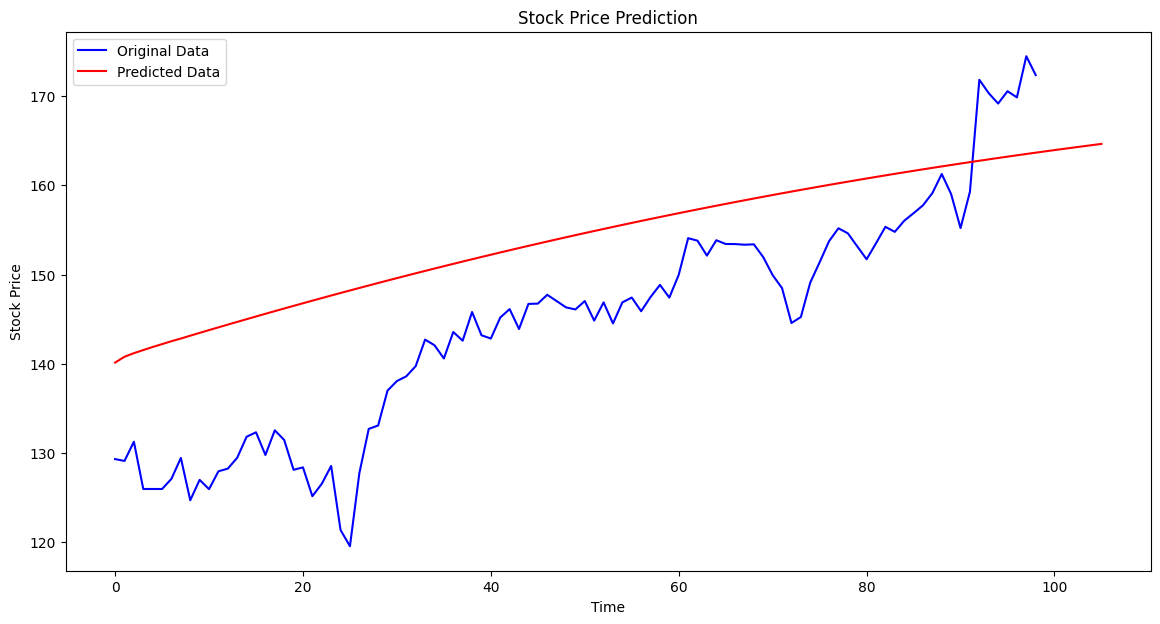

In [46]:
import matplotlib.pyplot as plt

# Inverse transform the original test data
original_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the original test data and the predicted values
plt.figure(figsize=(14, 7))
plt.plot(original_values, label='Original Data', color='blue')
plt.plot(predicted_values, label='Predicted Data', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [47]:
print(len(predicted_values))

106


In [48]:
print(len(original_values))

99


In [49]:
preds = predicted_values[-(len(predicted_values) - len(original_values)):]
preds

array([[163.79254],
       [163.93597],
       [164.07782],
       [164.21814],
       [164.3569 ],
       [164.49414],
       [164.62985]], dtype=float32)

In [50]:
original_values[-5:]

array([[169.1499939 ],
       [170.52999878],
       [169.83999634],
       [174.44999695],
       [172.33999634]])